# Introduction to Statistical Analysis in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Load the Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names, na_values='?')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(heart_data.head())

First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  


## Overview of Dataset Structure
This shows:
* Number of entries
* Column data types
* Missing Values Count

In [3]:
print("\nDataset Information:")
heart_data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Handle Missing Values
* The dataset uses `?` to represent missing entries.
* Replace missing values with the median for numerical columns.

In [4]:
print("\nMissing values per column:")
print(heart_data.isnull().sum())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [5]:
heart_data = heart_data.fillna(heart_data.median())

## Summary Statistics

The `describe()` function provides a quick statistical summary of your data:
- count: Number of non-missing values for each variable
- mean: The average value (sum of all values divided by count)
- std: Standard deviation, which measures how spread out the values are from the mean
- min: The minimum (smallest) value in the dataset
- 25%: The first quartile (Q1) - 25% of values fall below this number
- 50%: The median or second quartile (Q2) - the middle value when ordered
- 75%: The third quartile (Q3) - 75% of values fall below this number
- max: The maximum (largest) value in the dataset

The interquartile range (IQR) is Q3-Q1, representing the middle 50% of the data.

In [6]:
print("\nBasic Statistical Summary:")
print(heart_data.describe())


Basic Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   

# Basic Data Visualization

## a. Histogram of Age
* Age distribution shows two peaks
* Bulk of patients are between 45–60
* KDE curve smooths the distribution

C:\Users\sayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


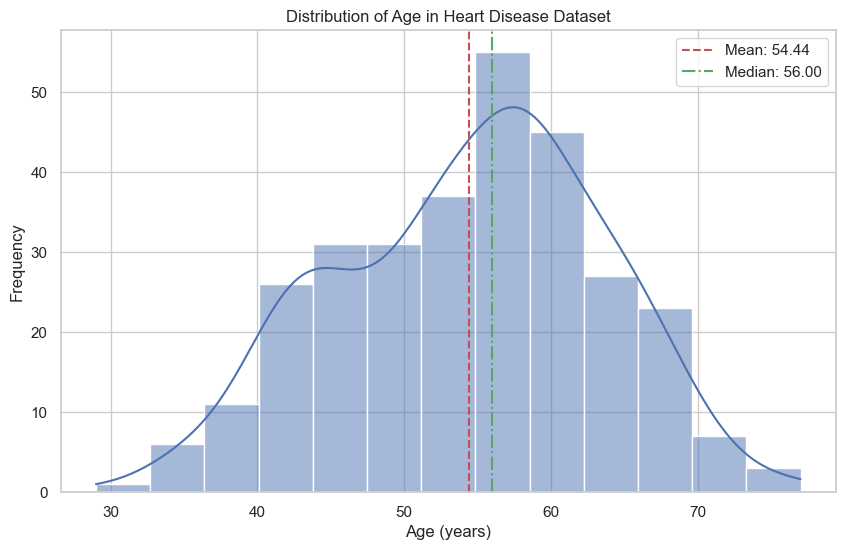

In [7]:
# Convert target variable to binary (0 = no disease, 1 = disease)
heart_data['target'] = heart_data['target'].apply(lambda x: 0 if x == 0 else 1)

# Convert sex to categorical for better interpretability
heart_data['sex'] = heart_data['sex'].map({0: 'Female', 1: 'Male'})

# Create a simple histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(heart_data['age'], kde=True)
plt.title('Distribution of Age in Heart Disease Dataset')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.axvline(heart_data['age'].mean(), color='r', linestyle='--',
            label=f'Mean: {heart_data["age"].mean():.2f}')
plt.axvline(heart_data['age'].median(), color='g', linestyle='-.',
            label=f'Median: {heart_data["age"].median():.2f}')
plt.legend()
plt.show()

## b. Box Plot: Cholestrol vs heart Disease
* Patients with heart disease tend to have higher cholesterol
* Outliers exist (e.g., cholesterol > 500 mg/dL)
* Box shows the middle 50% of values
* Line inside box = median

Boxplots help detect skewness and outliers at a glance.

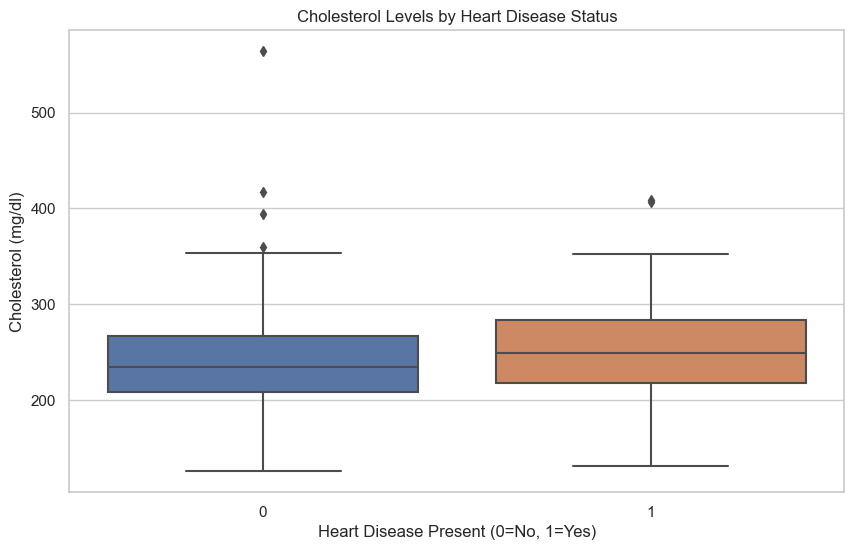

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart_data)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease Present (0=No, 1=Yes)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

## c. Count Plot: Gender vs Heart Disease
* More males in dataset
* Higher proportion of males show heart disease
* Females show lower disease prevalence

A simple plot can yield powerful insights about group differences.

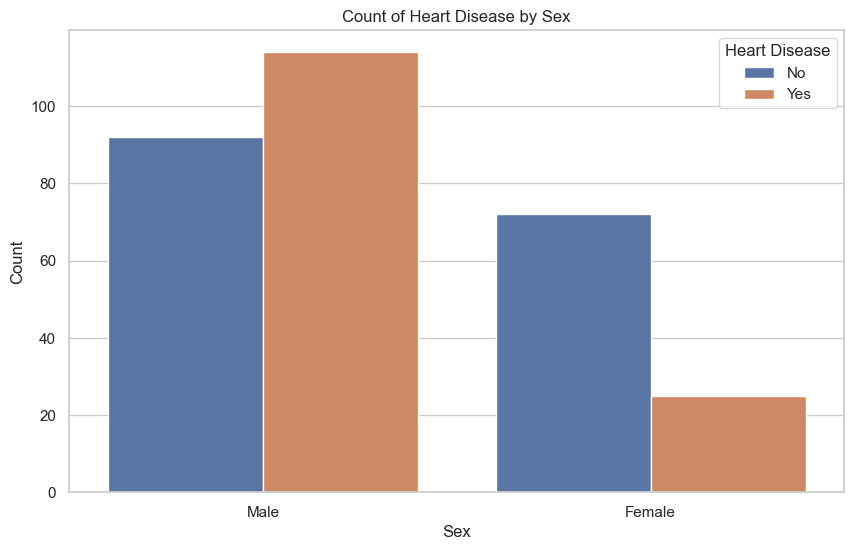

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=heart_data)
plt.title('Count of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

## d. Correlation Heatmap
Understanding correlations:
* Positive correlation (red): variables increase together
* Negative correlation (blue): one increases as the other decreases

Example insight:
* Age negatively correlates with maximum heart rate (physiologically expected)
* Chest pain type correlates with disease presence

Heatmaps are especially useful when you have many numeric variables.

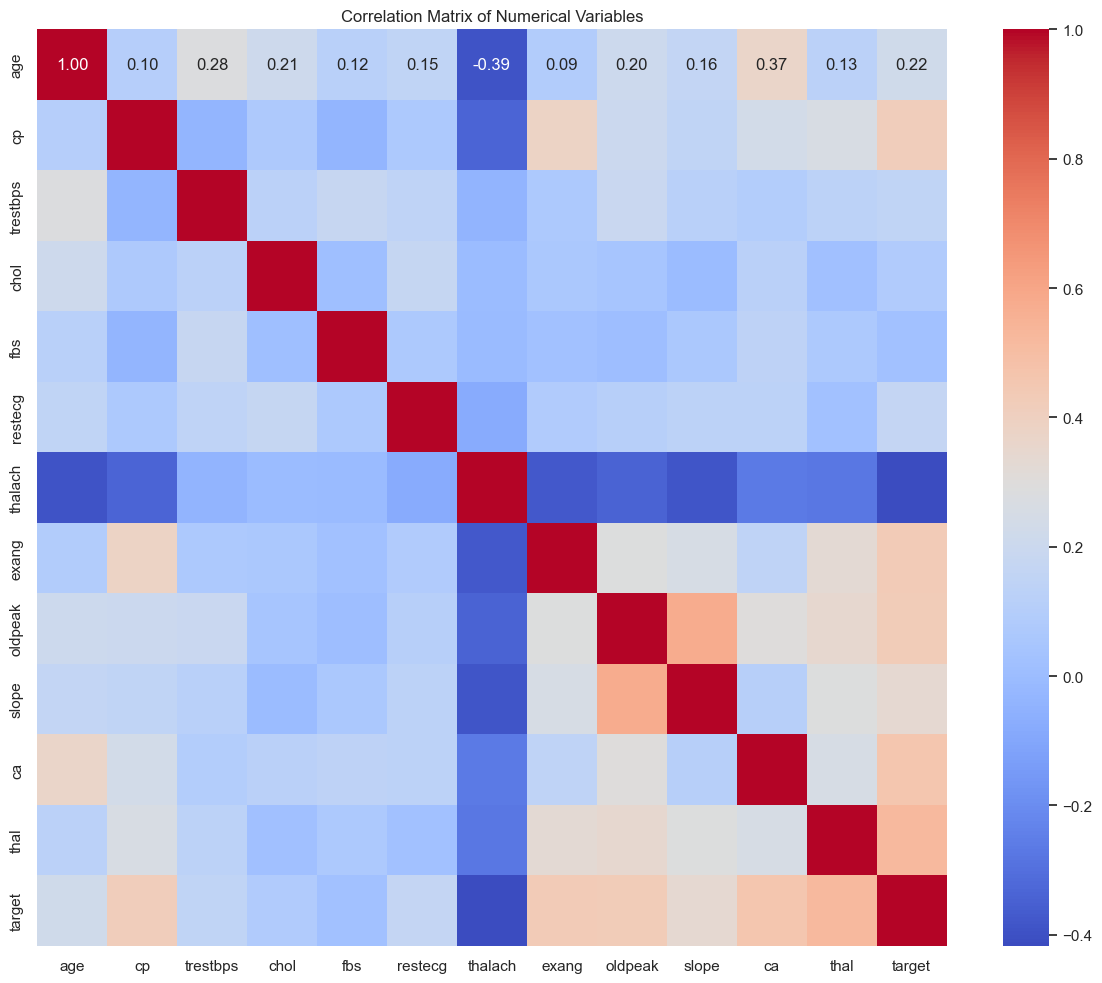

In [10]:
plt.figure(figsize=(12, 10))
numerical_cols = heart_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = heart_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()